<a href="https://colab.research.google.com/github/galileo15640215/RNN/blob/master/simple_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

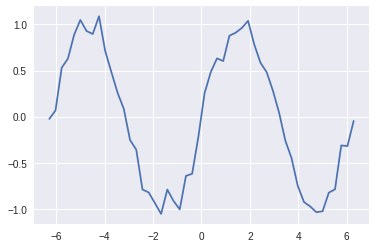

(40, 10, 1)
(40, 10, 1)


In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_data = np.linspace(-2*np.pi, 2*np.pi) #-2piから2piまで
sin_data = np.sin(x_data) + 0.1*np.random.randn(len(x_data)) #sin関数に乱数でノイズを加える

plt.plot(x_data, sin_data)
plt.show()

n_rnn = 10 #時系列の数
n_sample = len(x_data)-n_rnn #サンプル数
x = np.zeros((n_sample, n_rnn)) #入力
t = np.zeros((n_sample, n_rnn)) #正解
for i in range(0, n_sample):
  x[i] = sin_data[i:i+n_rnn]
  t[i] = sin_data[i+1:i+n_rnn+1]
  
x = x.reshape(n_sample, n_rnn, 1)
print(x.shape)
t = t.reshape(n_sample, n_rnn, 1)
print(t.shape)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

batch_size = 8
n_in = 1
n_mid = 20
n_out = 1

model = Sequential()
#SimpleRNN層の追加、return_sequenceをTrueにすると、時系列のすべてのRNN層が出力されます
#return_sequenceをTrueをfalseにすると、最後のRNN層のみが出力されます
model.add(SimpleRNN(n_mid, input_shape=(n_rnn, n_in), return_sequences=True))
model.add(Dense(n_out, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='sgd') #誤差は二乗誤差、最適化アルゴリズムはSGD
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_5 (SimpleRNN)     (None, 10, 20)            440       
_________________________________________________________________
dense_3 (Dense)              (None, 10, 1)             21        
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
history = model.fit(x, t, epochs=20, batch_size=batch_size, validation_split=0.1)

Instructions for updating:
Use tf.cast instead.
Train on 36 samples, validate on 4 samples
Epoch 1/20
36/36 [==============================] - 0s 10ms/step - loss: 0.4032 - val_loss: 0.3039
Epoch 2/20
36/36 [==============================] - 0s 515us/step - loss: 0.2420 - val_loss: 0.1830
Epoch 3/20
36/36 [==============================] - 0s 427us/step - loss: 0.1711 - val_loss: 0.1258
Epoch 4/20
36/36 [==============================] - 0s 414us/step - loss: 0.1349 - val_loss: 0.0943
Epoch 5/20
36/36 [==============================] - 0s 411us/step - loss: 0.1123 - val_loss: 0.0780
Epoch 6/20
36/36 [==============================] - 0s 427us/step - loss: 0.0990 - val_loss: 0.0662
Epoch 7/20
36/36 [==============================] - 0s 372us/step - loss: 0.0901 - val_loss: 0.0623
Epoch 8/20
36/36 [==============================] - 0s 362us/step - loss: 0.0837 - val_loss: 0.0595
Epoch 9/20
36/36 [==============================] - 0s 406us/step - loss: 0.0791 - val_loss: 0.0553
Epoch 10/2

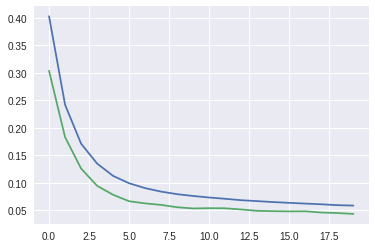

In [0]:
loss = history.history['loss']
vloss = history.history['val_loss']

plt.plot(np.arange(len(loss)), loss)
plt.plot(np.arange(len(vloss)), vloss)
plt.show()

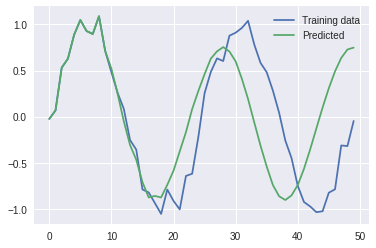

In [0]:
predicted = x[0].reshape(-1)

for i in range(0, n_sample):
  y = model.predict(predicted[-n_rnn:].reshape(1, n_rnn, 1))
  predicted = np.append(predicted, y[0][n_rnn-1][0])
  
plt.plot(np.arange(len(sin_data)), sin_data, label = 'Training data')
plt.plot(np.arange(len(predicted)), predicted, label = 'Predicted')
plt.legend()
plt.show()